# Assignment 2

In [104]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

Leer los datos del CSV creando un data frame de pandas.

In [86]:
data = pd.read_csv('../data/housing-week-2.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008.0,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007.0,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008.0,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006.0,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008.0,WD,Normal,250000


¿Cuántas columnas hay en el dataframe?

In [119]:
data.shape[1]

81

Calcula los descriptores estadísticos básicos para las columnas numéricas

In [88]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1422.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.810830,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.345389,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


¿Cuántas columnas numéricas y cuántas columnas categóricas hay?

In [89]:
non_numeric_data = data.select_dtypes(exclude=np.number)
numeric_columns = numeric_data.columns.size
non_numeric_columns = non_numeric_data.columns.size
'{} numeric, {} non numeric'.format(numeric_columns, non_numeric_columns)

'38 numeric, 43 non numeric'

¿Cuáles variables tienen más del 50% de valores NaN?

In [90]:
nan_percents = data.isna().mean()
nan_percents[nan_percents > .5].keys().tolist()

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

¿Cuántos valores faltantes tiene cada una de las variables categóricas?

In [91]:
non_numeric_empty_rows = non_numeric_data.isna().sum()
non_numeric_empty_rows[non_numeric_empty_rows > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

¿Cuántos valores faltantes tiene cada una de las variables numéricas?

In [92]:
numeric_empty_rows = numeric_data.isna().sum()
numeric_empty_rows[numeric_empty_rows > 0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
YrSold          38
MasVnrArea       8
dtype: int64

Sustituye los valores faltantes de la columna YrSold con la media de esa columna

In [102]:
mean_yr_sold = data.YrSold.mean()
data.YrSold.fillna(value=mean_yr_sold, inplace=True)

Sustituye los valores faltantes de la columna LotFrontage con la mediana de esa columna

In [103]:
mean_lot_frontage = data.LotFrontage.mean()
data.LotFrontage.fillna(value=mean_lot_frontage, inplace=True)

Codifica la columna SaleCondition utilizando One-Hot-Encoding

In [121]:
encoded_sale_condition = pd.get_dummies(data['SaleCondition'])
data.join(encoded_sale_condition)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008.0,WD,Normal,208500,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007.0,WD,Normal,181500,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008.0,WD,Normal,223500,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006.0,WD,Abnorml,140000,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008.0,WD,Normal,250000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,2007.0,WD,Normal,175000,0,0,0,0,1,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2010.0,WD,Normal,210000,0,0,0,0,1,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2010.0,WD,Normal,266500,0,0,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,2010.0,WD,Normal,142125,0,0,0,0,1,0


Crea una columna TotalBath a partir de la suma de baños completos e incompletos (debes descubrir cuales columnas sumar). Hint: las cantidades de baños incompletos debe multiplicarse por 0.5 antes de sumarse.

In [122]:
data['TotalBath'] = data['BsmtFullBath'] + data['FullBath'] + \
                    (data['BsmtHalfBath'] * .5) + (data['HalfBath'] * .5)
data['TotalBath']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1455    2.5
1456    3.0
1457    2.0
1458    2.0
1459    2.5
Name: TotalBath, Length: 1460, dtype: float64

Gráfica la distribución de la columna LotArea

(0.0, 25000.0)

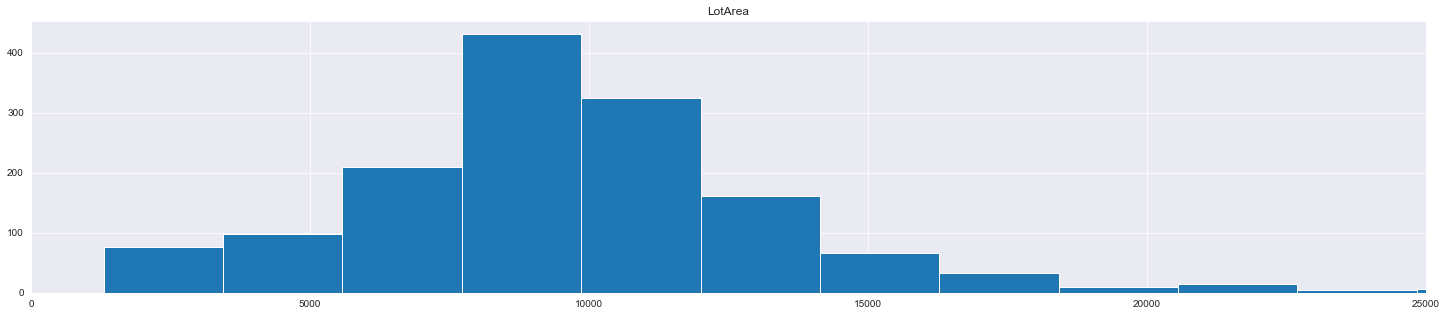

In [151]:
ax = data.hist(column='LotArea', bins=100, figsize=(25, 5))
ax[0][0].set_xlim(0, 25000)

Gráfica la distribución de la columna SalePrice

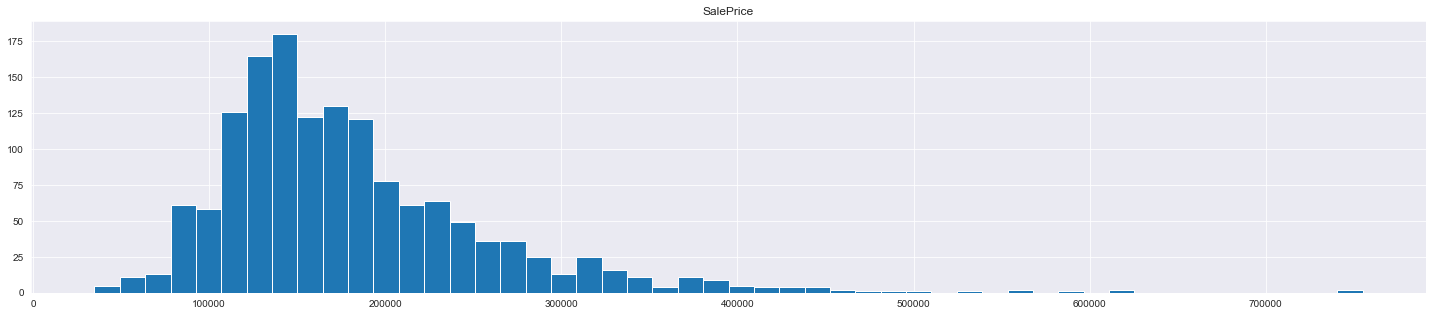

In [145]:
ax = data.hist(column='SalePrice', bins=50, figsize=(25, 5))


Elimina la columna Id del dataset.

In [152]:
data.drop(columns=['Id'])


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008.0,WD,Normal,208500,3.5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007.0,WD,Normal,181500,2.5
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008.0,WD,Normal,223500,3.5
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006.0,WD,Abnorml,140000,2.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008.0,WD,Normal,250000,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007.0,WD,Normal,175000,2.5
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010.0,WD,Normal,210000,3.0
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010.0,WD,Normal,266500,2.0
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010.0,WD,Normal,142125,2.0
